## Implementing the Recommendation System

### Content-Based Filtering

In a content-based filtering system, recommendations are made by comparing the content (features) of items. For images, feature extraction can be done using techniques like Convolutional Neural Networks (CNNs).

Here’s a step-by-step approach to implement a content-based recommendation system:<Br>

Feature Extraction: Use a pre-trained CNN model to extract features from the product images.<Br>
>Here used pre-trained CNN (e.g., VGG16) to extract features from the images.<br>
Similarity Calculation: Compute the similarity between the selected product's features and all other products' features.<br>
Recommendation: Recommend products with the highest similarity scores.<br>

In [1]:
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.models import Model

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features.flatten()


Cosine similarity measures the cosine of the angle between two non-zero vectors, which gives a measure of how similar the two vectors are.

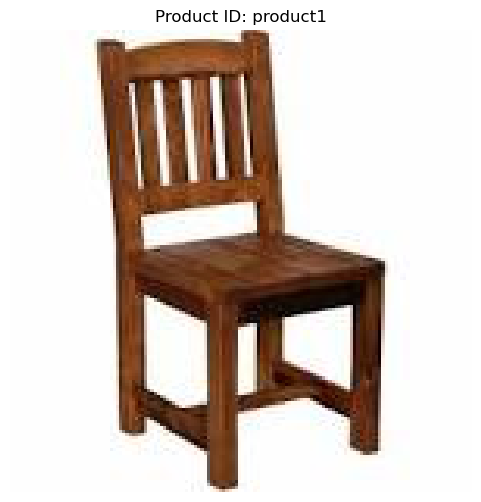

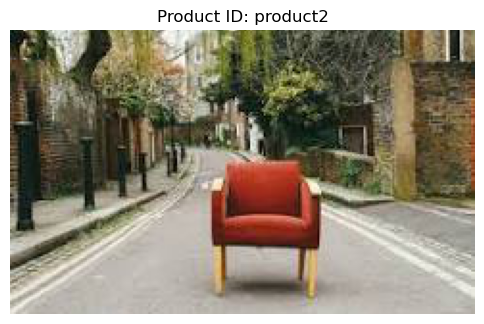

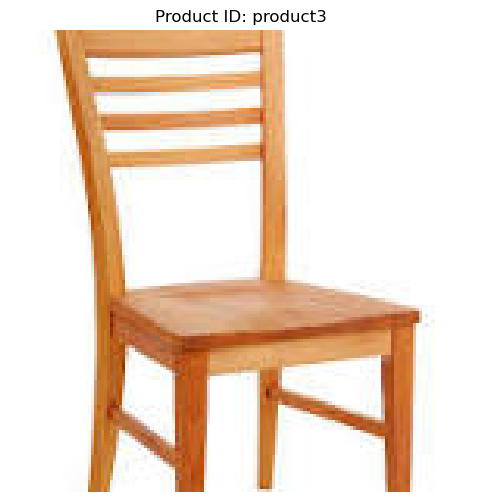

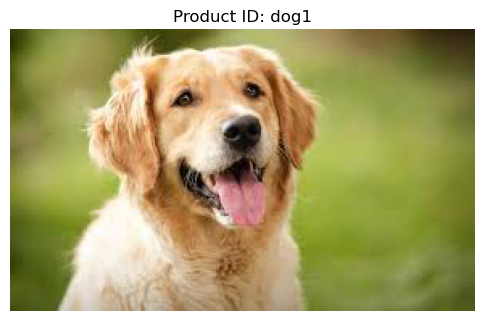

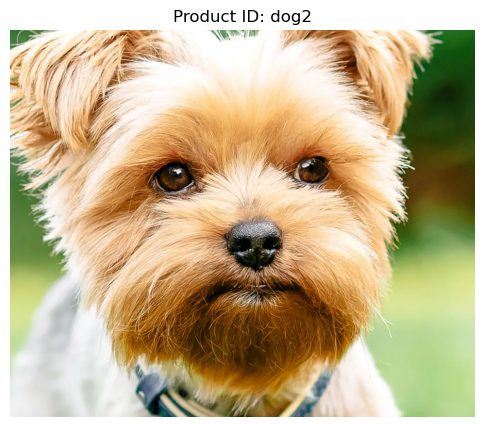

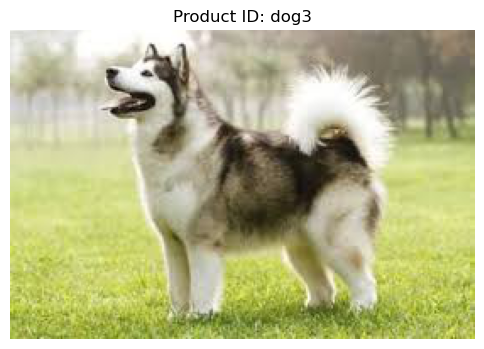

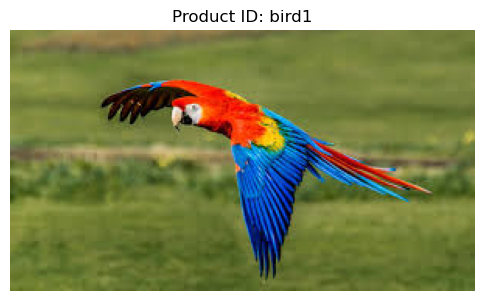

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 363ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step


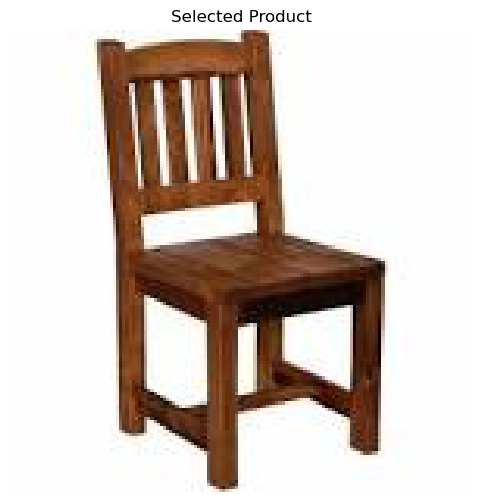

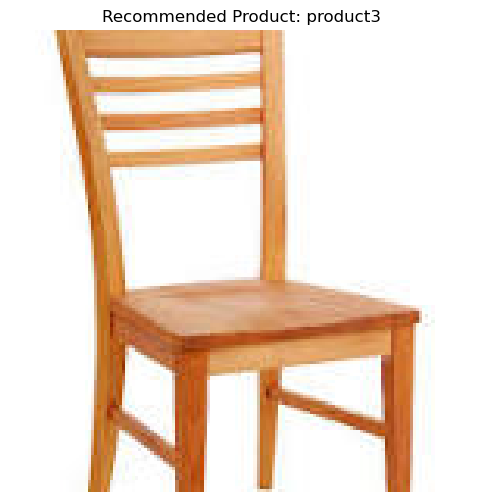

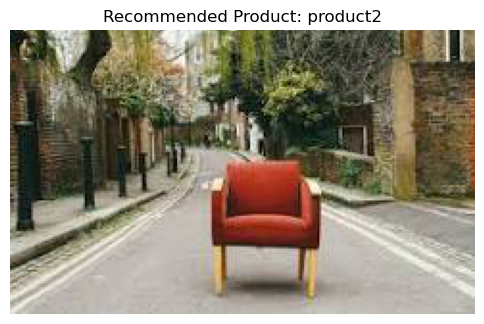

In [2]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.models import Model
import numpy as np

# Load the VGG16 model pre-trained on ImageNet
base_model = VGG16(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)

def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features.flatten()

# Example image paths and categories
image_paths = {
    'product1': 'C1.jpeg',
    'product2': 'C2.jpeg',
    'product3': 'C3.jpeg',
    'dog1': 'P4.jpeg',
    'dog2': 'P5.jpg',
    'dog3': 'P6.jpeg',
    'bird1': 'P8.jpeg',
}

categories = {
    'product1': 'furniture',
    'product2': 'furniture',
    'product3': 'furniture',
    'dog1': 'animal',
    'dog2': 'animal',
    'dog3': 'animal',
    'bird1': 'bird',
}

# Function to display a single image
def display_image(image_path, title="Image"):
    img = mpimg.imread(image_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Function to display all images
def display_all_images(image_paths):
    for product_id, path in image_paths.items():
        display_image(path, f'Product ID: {product_id}')

# Example usage to display all images
display_all_images(image_paths)

# Extract features
features_dict = {product_id: extract_features(path) for product_id, path in image_paths.items()}

def get_similar_products(selected_product_id, features_dict, categories, top_n=5):
    selected_product_features = features_dict[selected_product_id].reshape(1, -1)
    selected_category = categories[selected_product_id]
    similarities = {}
    for product_id, features in features_dict.items():
        if product_id != selected_product_id and categories[product_id] == selected_category:
            similarity = cosine_similarity(selected_product_features, features.reshape(1, -1))
            similarities[product_id] = similarity[0][0]
    sorted_products = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return sorted_products[:top_n]

def display_recommendations(selected_product_id, features_dict, image_paths, categories, top_n=5):
    similar_products = get_similar_products(selected_product_id, features_dict, categories, top_n)
    
    # Display the selected product
    display_image(image_paths[selected_product_id], 'Selected Product')
    
    # Display the recommended products
    for product_id, _ in similar_products:
        display_image(image_paths[product_id], f'Recommended Product: {product_id}')

# Example usage
display_recommendations('product1', features_dict, image_paths, categories)


In [4]:
selected_product_id = 'product1'
similar_products = get_similar_products(selected_product_id, features_dict,categories)
similar_products

[('product3', 0.7418502), ('product2', 0.2372449)]

In [6]:
import ipywidgets as widgets
from IPython.display import display, clear_output
import re
def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_data = image.img_to_array(img)
    img_data = np.expand_dims(img_data, axis=0)
    img_data = preprocess_input(img_data)
    features = model.predict(img_data)
    return features.flatten()

users = {
    'sellers': [],
    'buyers': []
}

products = []
features_dict = {}
image_paths = {}

# Validation functions for seller and buyer details
def is_valid_pincode(pincode):
    return len(pincode) == 6 and pincode.isdigit()

def is_valid_contact(contact):
    return len(contact) == 10 and contact.isdigit()

def is_valid_email(email):
    pattern = r'^[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}$'
    return re.match(pattern, email) is not None

# Modified add_seller function with validation
def add_seller(name, furniture, pincode, address, contact_details, product_price, customizable, image_path):
    if not is_valid_pincode(pincode):
        print("Invalid pincode. Please enter a 6-digit pincode.")
        return
    if not is_valid_contact(contact_details) and not is_valid_email(contact_details):
        print("Invalid contact details. Please enter a 10-digit mobile number or a valid email address.")
        return

    product_id = f'product{len(products) + 1}'
    seller = {
        'product_id': product_id,
        'name': name,
        'furniture': furniture,
        'pincode': pincode,
        'address': address,
        'contact_details': contact_details,
        'product_price': product_price,
        'customizable': customizable,
        'image_path': image_path
    }
    users['sellers'].append(seller)
    products.append(seller)
    features_dict[product_id] = extract_features(image_path)
    image_paths[product_id] = image_path
    print("Seller added successfully.")

def add_buyer(name, address, pincode, contact_number, email):
    if not is_valid_pincode(pincode):
        print("Invalid pincode. Please enter a 6-digit pincode.")
        return
    if not is_valid_contact(contact_number):
        print("Invalid contact number. Please enter a 10-digit mobile number.")
        return
    if not is_valid_email(email):
        print("Invalid email address. Please enter a valid email.")
        return
    
    buyer = {
        'name': name,
        'address': address,
        'pincode': pincode,
        'contact_number': contact_number,
        'email': email
    }
    users['buyers'].append(buyer)
    
    filtered_products = filter_products_by_pincode(pincode)
    if filtered_products:
        display_products(filtered_products)
    else:
        print("No available products in the given area.")
        nearest_products = get_nearest_products(pincode)
        if nearest_products:
            print("Showing products near the entered pincode:")
            display_products(nearest_products)
        else:
            print("No nearby products found.")

def filter_products_by_pincode(pincode):
    return [product for product in products if product['pincode'] == pincode]

def get_nearest_products(pincode):
    # Placeholder for nearest products logic
    return products[:5]  # Display first 5 products as a simple placeholder

def get_similar_products(selected_product_id, features_dict, top_n=5):
    selected_product_features = features_dict[selected_product_id].reshape(1, -1)
    similarities = {}
    for product_id, features in features_dict.items():
        if product_id != selected_product_id:
            similarity = cosine_similarity(selected_product_features, features.reshape(1, -1))
            similarities[product_id] = similarity[0][0]
    sorted_products = sorted(similarities.items(), key=lambda x: x[1], reverse=True)
    return sorted_products[:top_n]

def display_image(image_path, title="Image"):
    img = mpimg.imread(image_path)
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title(title)
    plt.axis('off')
    plt.show()

def display_products(products):
    for product in products:
        display_image(product['image_path'], f"{product['name']}'s {product['furniture']}")

def display_recommendations(selected_product_id, features_dict, image_paths, top_n=5):
    similar_products = get_similar_products(selected_product_id, features_dict, top_n)
    display_image(image_paths[selected_product_id], 'Selected Product')
    for product_id, _ in similar_products:
        display_image(image_paths[product_id], f'Recommended Product: {product_id}')

# Seller input widgets
seller_name = widgets.Text(description="Name:")
seller_furniture = widgets.Text(description="Furniture:")
seller_pincode = widgets.Text(description="Pincode:")
seller_address = widgets.Text(description="Address:")
seller_contact = widgets.Text(description="Contact (Mobile or Email):")
seller_price = widgets.FloatText(description="Price:")
seller_customizable = widgets.Checkbox(description="Customizable")
seller_image_path = widgets.Text(description="Image Path:")
add_seller_button = widgets.Button(description="Add Seller")

# Buyer input widgets
buyer_name = widgets.Text(description="Name:")
buyer_address = widgets.Text(description="Address:")
buyer_pincode = widgets.Text(description="Pincode:")
buyer_contact = widgets.Text(description="Contact:")
buyer_email = widgets.Text(description="Email:")
add_buyer_button = widgets.Button(description="Add Buyer")

# Handlers for adding seller and buyer
def add_seller_handler(b):
    add_seller(seller_name.value, seller_furniture.value, seller_pincode.value, seller_address.value,
               seller_contact.value, seller_price.value, seller_customizable.value, seller_image_path.value)

def add_buyer_handler(b):
    add_buyer(buyer_name.value, buyer_address.value, buyer_pincode.value, buyer_contact.value, buyer_email.value)

add_seller_button.on_click(add_seller_handler)
add_buyer_button.on_click(add_buyer_handler)

# Display seller and buyer input widgets
display(seller_name, seller_furniture, seller_pincode, seller_address, seller_contact, seller_price, seller_customizable, seller_image_path, add_seller_button)
display(buyer_name, buyer_address, buyer_pincode, buyer_contact, buyer_email, add_buyer_button)

Text(value='', description='Name:')

Text(value='', description='Furniture:')

Text(value='', description='Pincode:')

Text(value='', description='Address:')

Text(value='', description='Contact (Mobile or Email):')

FloatText(value=0.0, description='Price:')

Checkbox(value=False, description='Customizable')

Text(value='', description='Image Path:')

Button(description='Add Seller', style=ButtonStyle())

Text(value='', description='Name:')

Text(value='', description='Address:')

Text(value='', description='Pincode:')

Text(value='', description='Contact:')

Text(value='', description='Email:')

Button(description='Add Buyer', style=ButtonStyle())